In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Resources/tsunami.csv")

### Filter for Last 100 Years
---

In [3]:
previous_100 = df[df['Year'] >= 1921]

In [4]:
previous_100.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,...,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged
1002,1921.0,5.0,14.0,11.0,17.0,45.0,2.0,1.0,6.2,0.0,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1003,1921.0,8.0,4.0,NaN,NaN,NaN,3.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1004,1921.0,9.0,11.0,4.0,1.0,38.0,4.0,1.0,7.5,0.0,...,-2.3,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,1921.0,11.0,11.0,18.0,36.0,8.0,3.0,1.0,7.5,0.0,...,0.5,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1006,1921.0,12.0,16.0,NaN,NaN,NaN,-1.0,9.0,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Columns 😽😽😽

In [5]:
columns_drop = ['Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsunami Magnitude (Iida)', 'Total Injuries']

previous_100.drop(columns_drop, axis =1 , inplace = True)

In [6]:
previous_100.isnull().sum().sort_values(ascending = False)

Total Missing                1151
Total Missing Description    1150
Total Houses Damaged         1091
Total Damage ($Mil)          1026
Total Houses Destroyed       1019
Total Deaths                  819
Tsunami Intensity             745
Total Damage Description      608
Maximum Water Height (m)      318
Earthquake Magnitude          260
Longitude                      64
Latitude                       64
Tsunami Event Validity          0
Number of Runups                0
Location Name                   0
Country                         0
Deposits                        0
Tsunami Cause Code              0
Year                            0
dtype: int64

In [7]:
too_many_nulls = ['Total Missing', 'Total Missing Description', 'Total Houses Damaged',
                 'Total Damage ($Mil)', 'Total Houses Destroyed', 'Total Damage Description']

previous_100.drop(too_many_nulls, axis = 1, inplace = True)

***Drop all columns that have many non-nulls***

* Total Missing
* Total Missing Description
* Total Houses Damaged
* Total Damaged ($Mil)
* Total Damage Description - Can't analyze String, unless someone is a NPL (natural language processising) expert

### Must have coordinates 

In [8]:
previous_100 = previous_100[previous_100['Latitude'].notnull()]
previous_100

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths
1002,1921.0,2.0,1.0,6.2,0.0,INDONESIA,MAKASSAR STRAIT,0.700,117.900,1.00,1.0,0.5,NaN
1003,1921.0,3.0,1.0,NaN,0.0,CHINA,"XIAOSI, DANDONG, LIAONING",40.130,124.380,NaN,0.0,NaN,NaN
1004,1921.0,4.0,1.0,7.5,0.0,INDONESIA,JAVA,-11.000,111.000,0.10,3.0,-2.0,NaN
1005,1921.0,3.0,1.0,7.5,0.0,PHILIPPINES,PHILIPPINE TRENCH,8.000,127.000,NaN,4.0,1.0,NaN
1007,1922.0,2.0,1.0,7.2,0.0,PERU,S. PERU,-16.500,-73.000,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,2021.0,4.0,1.0,7.1,0.0,PHILIPPINES,"MINDANAO ISLAND, PHILIPPINES",6.455,126.742,0.05,2.0,NaN,1.0
2158,2021.0,4.0,1.0,8.1,0.0,UK TERRITORY,SOUTHERN ATLANTIC OCEAN,-58.416,-25.321,0.64,44.0,NaN,NaN
2159,2021.0,4.0,1.0,7.2,0.0,HAITI,PORT-AU-PRINCE,18.408,-73.475,NaN,3.0,NaN,2248.0
2160,2021.0,4.0,1.0,7.0,0.0,MEXICO,S. MEXICO,16.982,-99.773,0.48,1.0,NaN,3.0


### Replace Nulls with Column Mean 
---

If nulls is not significant, can replace with mean of non-nulls.

In [9]:
previous_100.isnull().sum().sort_values()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Number of Runups              0
Earthquake Magnitude        198
Maximum Water Height (m)    286
Tsunami Intensity           690
Total Deaths                763
dtype: int64

In [10]:
# Fill Low Na Columns with Mean 
previous_100 = previous_100[previous_100['Earthquake Magnitude'].notnull()]
# previous_100['Earthquake Magnitude'] = previous_100['Earthquake Magnitude'].fillna(previous_100['Earthquake Magnitude'].mean())
#previous_100['Maximum Water Height (m)'] = previous_100['Maximum Water Height (m)'].fillna(previous_100['Maximum Water Height (m)'].mean())
previous_100 = previous_100[previous_100['Maximum Water Height (m)'].notnull()]

## Key Columns 🔑🔑🔑

1) Water Height  
2) Tsunami Intensity vs. Magnitude (Intensity v. Magnitude Ratio)  
3) Total Deaths  
4) Earthquake Magnitude


Since the key columns we want also have the most nulls, we are likely forced to delete rows with nulls.

In [11]:
intensity = previous_100[previous_100['Tsunami Intensity'].notnull()]

In [12]:
intensity.isnull().sum()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Earthquake Magnitude          0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Maximum Water Height (m)      0
Number of Runups              0
Tsunami Intensity             0
Total Deaths                168
dtype: int64

In [13]:
# Fill magnitude with mean, close enough 
#intensity = intensity[intensity['Tsunami Magnitude (Iida)'].notnull()]

In [14]:
intensity.isnull().sum()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Earthquake Magnitude          0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Maximum Water Height (m)      0
Number of Runups              0
Tsunami Intensity             0
Total Deaths                168
dtype: int64

### Mapping of Cause Code

In [15]:
dict_ = {"Tsunami Cause Code": [x for x in range(0,12)],
        "Natural Disaster": ['Unknown', 'Earthquake', 'Questionable Earthquake', 'Earthquake and Landslide',
                            'Volcano and Earthquake', 'Volcano, Earthquake, and Landslaide', 'Volcano',
                            'Volcano and Landslide', 'Landslide', 'Meterological', 'Explosion', 'Astronomical Tide']}

code = pd.DataFrame(dict_)

intensity = pd.merge(intensity, code, on = 'Tsunami Cause Code')

intensity.head()

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths,Natural Disaster
0,1921.0,2.0,1.0,6.2,0.0,INDONESIA,MAKASSAR STRAIT,0.700,117.900,1.0,1.0,0.5,NaN,Earthquake
1,1921.0,4.0,1.0,7.5,0.0,INDONESIA,JAVA,-11.000,111.000,0.1,3.0,-2.0,NaN,Earthquake
2,1922.0,2.0,1.0,6.3,0.0,PHILIPPINES,CEBU ISLAND,10.200,124.100,0.7,3.0,0.0,5.0,Earthquake
3,1922.0,4.0,1.0,8.7,0.0,CHILE,NORTHERN CHILE,-28.553,-70.755,9.0,36.0,2.5,700.0,Earthquake
4,1922.0,3.0,1.0,6.3,0.0,NEW ZEALAND,SE. NEW ZEALAND,-43.000,173.000,0.4,3.0,0.0,NaN,Earthquake


In [42]:
intensity.to_csv("./Cleaned_Data_intensity.csv", index = False)

In [17]:
deaths_df = intensity[intensity['Total Deaths'].notnull()]
deaths_df.to_csv("./Cleaned_Data_deaths.csv", index = False)
deaths_df

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Intensity,Total Deaths,Natural Disaster
2,1922.0,2.0,1.0,6.3,0.0,PHILIPPINES,CEBU ISLAND,10.200,124.100,0.7,3.0,0.0,5.0,Earthquake
3,1922.0,4.0,1.0,8.7,0.0,CHILE,NORTHERN CHILE,-28.553,-70.755,9.0,36.0,2.5,700.0,Earthquake
5,1923.0,4.0,1.0,7.2,1.0,RUSSIA,KAMCHATKA,56.500,162.500,20.0,11.0,3.5,18.0,Earthquake
7,1923.0,4.0,1.0,7.9,1.0,JAPAN,SAGAMI BAY,35.100,139.500,13.0,140.0,3.0,142807.0,Earthquake
12,1927.0,4.0,1.0,6.8,0.0,UKRAINE,"CRIMEA, BLACK SEA",44.400,34.500,1.0,1.0,2.0,11.0,Earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1992.0,4.0,3.0,7.8,9.0,INDONESIA,FLORES SEA,-8.480,121.896,26.2,111.0,2.7,2500.0,Earthquake and Landslide
280,1995.0,4.0,3.0,6.9,0.0,INDONESIA,TIMOR SEA,-8.452,125.049,4.0,2.0,1.5,11.0,Earthquake and Landslide
281,1995.0,4.0,3.0,6.5,1.0,GREECE,GULF OF CORINTH: AIYION,38.401,22.283,1.0,2.0,3.0,26.0,Earthquake and Landslide
283,1933.0,4.0,6.0,6.0,1.0,RUSSIA,"KHARIMKOTAN, N. KURIL ISLANDS",49.120,154.508,9.0,2.0,2.0,2.0,Volcano


## Distribution of Year
---

Looks like despite focusing on Intensity the year is more or less well distributed.. good nuff

(array([23., 20., 28., 26., 31., 46., 43., 13., 19., 36.]),
 array([1921. , 1929.2, 1937.4, 1945.6, 1953.8, 1962. , 1970.2, 1978.4,
        1986.6, 1994.8, 2003. ]),
 <BarContainer object of 10 artists>)

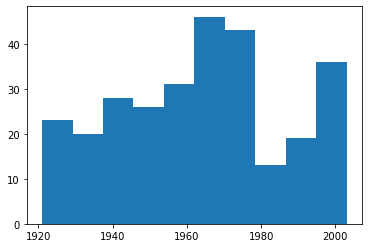

In [18]:
import matplotlib.pyplot as plt

plt.hist(intensity['Year'])

## API Test

In [11]:
import requests 
import json

In [12]:
check = requests.get('http://127.0.0.1:5000/api/v1.0/Tsunami')

In [13]:
check

<Response [200]>

In [14]:
data = check.json()

In [15]:
data

[{'Country': 'NEW ZEALAND',
  'Deposits': 0.0,
  'Earthquake Magnitude': 6.3,
  'Latitude': -43.0,
  'Location Name': 'SE. NEW ZEALAND',
  'Longitude': 173.0,
  'Maximum Water Height (m)': 0.4,
  'Natural Disaster': 'Earthquake',
  'Number of Runups': 3.0,
  'Total Deaths': '',
  'Tsunami Cause Code': 1.0,
  'Tsunami Event Validity': 3.0,
  'Tsunami Intensity': 0.0,
  'Year': 1922.0},
 {'Country': 'JAPAN',
  'Deposits': 0.0,
  'Earthquake Magnitude': 7.7,
  'Latitude': 34.9,
  'Location Name': 'RYUKYU ISLANDS',
  'Longitude': 140.2,
  'Maximum Water Height (m)': 0.3,
  'Natural Disaster': 'Earthquake',
  'Number of Runups': 6.0,
  'Total Deaths': '',
  'Tsunami Cause Code': 1.0,
  'Tsunami Event Validity': 4.0,
  'Tsunami Intensity': -1.5,
  'Year': 1923.0},
 {'Country': 'PHILIPPINES',
  'Deposits': 0.0,
  'Earthquake Magnitude': 6.3,
  'Latitude': 10.2,
  'Location Name': 'CEBU ISLAND',
  'Longitude': 124.1,
  'Maximum Water Height (m)': 0.7,
  'Natural Disaster': 'Earthquake',
  'Num